In [27]:
import numpy as np
from scipy import optimize

In [16]:
parms = [3.,2.,0.1,100.]

In [3]:
k11 = parms[0]
k21 = parms[1]
k22 = parms[2]
l20 = parms[3]

In [4]:
rtot = 0.005

In [8]:
def func(x,parms,rtot,lig):
    
    k11 = parms[0]
    k21 = parms[1]
    k22 = parms[2]
    l20 = parms[3]

    return x*(1 + k11*lig) + (x**2)*l20*(1 + k21*lig + k21*k22*(lig**2)) - rtot

In [28]:
func(0.003,parms,rtot,np.array([0.002,0.005,0.01]))

array([-0.0010784 , -0.001046  , -0.00099198])

In [29]:
x0 = optimize.fsolve(func,0.003,args=(parms,rtot,np.array([0.002,0.005,0.01])))

In [22]:
x0

array([ 0.00364455])

In [24]:
def genfunc(parm,lig,rtot):
        '''Generates ligand binding data according to Wyman model.
        Takes numpy arrays containing parameters k11,k21,k22,l20; 
        free ligand concentrations, and total receptor concentrations.
        Must be iterated against ligand data, i.e., for loop required when
        used for more than one receptor concentration. In fitting functions,
        the datasets are concentatenated for faster operation'''
    
        k11 = parm[0]
        k21 = parm[1]
        k22 = parm[2]
        l20 = parm[3]
    
        rfree = (((-1 - k11*lig)) + \
        (np.sqrt((np.square((1 + k11*lig)) + \
        8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig))))))) \
        / (4*l20*(1 + k21*lig + k21*k22*(np.square(lig))))    
       
        bfrac = (k11*lig + l20*k21*rfree*lig + \
        2*l20*k21*k22*rfree*(np.square(lig))) \
        / (1 + 2*l20*rfree + k11*lig + \
        2*l20*k21*rfree*lig + 2*l20*k21*k22*rfree*(np.square(lig)))
    
        return bfrac, rfree

In [25]:
def dilser(low=0.001, limit=100., dilfactor=2.):
    '''returns a numpy array dilution series from low to limit'''
    #replace this with a generator/iterator someday
    a = [low]
    while a[-1] <= limit:
        a.append(a[len(a)-1]*dilfactor)       
    return np.array(a)

In [30]:
ligs = dilser()

In [31]:
ligs

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [78]:
bfrac,rfree = genfunc(parms,ligs,0.005)

In [34]:
ligs.size

18

In [52]:
guess = np.ones(18)/10

In [79]:
x0 = optimize.fsolve(func,guess,args=(parms,0.005,ligs))

In [80]:
x0

array([  3.65238383e-03,   3.64454658e-03,   3.62897015e-03,
         3.59820400e-03,   3.53817527e-03,   3.42380607e-03,
         3.21549381e-03,   2.86556859e-03,   2.35119097e-03,
         1.72731571e-03,   1.12639330e-03,   6.63334113e-04,
         3.63783074e-04,   1.91097240e-04,   9.80214423e-05,
         4.96521191e-05,   2.49894275e-05,   1.25359408e-05])

In [55]:
import matplotlib.pyplot as plt

In [57]:
%matplotlib inline

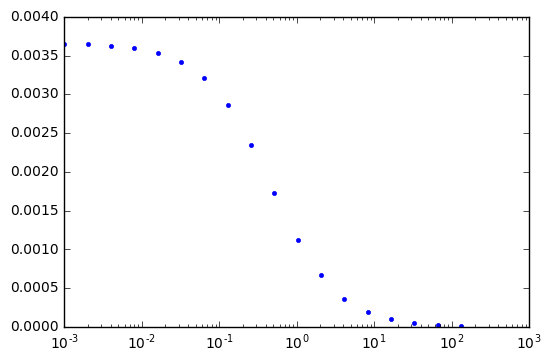

In [59]:
plt.semilogx(ligs,x0,'.')

In [61]:
x1 = optimize.root(func,guess,args=(parms,0.005,ligs))

In [64]:
x1.x

array([  3.65238383e-03,   3.64454658e-03,   3.62897015e-03,
         3.59820400e-03,   3.53817527e-03,   3.42380607e-03,
         3.21549381e-03,   2.86556859e-03,   2.35119097e-03,
         1.72731571e-03,   1.12639330e-03,   6.63334113e-04,
         3.63783074e-04,   1.91097240e-04,   9.80214423e-05,
         4.96521191e-05,   2.49894275e-05,   1.25359408e-05])

In [86]:
x1 = optimize.root(func,[0.01,-.01],args=(parms,0.005,ligs[8]))

In [87]:
x1.x

array([ 0.00235119, -0.01394382])

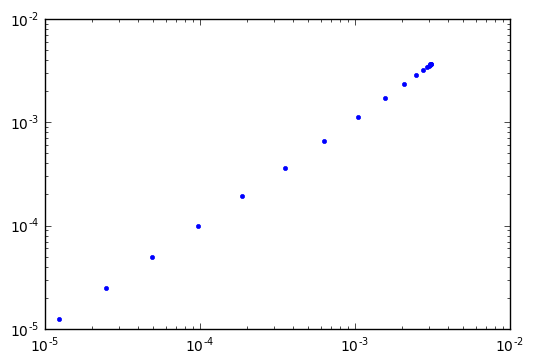

In [83]:
plt.loglog(rfree,x0,'.')

In [88]:
class Foo:
  def setAllWithKwArgs(self, **kwargs):
    for key, value in kwargs.items():
      setattr(self, key, value)

In [90]:
g = Foo()

In [94]:
g.setAllWithKwArgs(h1=3)

In [95]:
g.h1

3